<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_03_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [23]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [24]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
model_1 = Sequential()
model_1.add(Input(shape=(28, 28)))
model_1.add(Flatten())

In [27]:
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [28]:
model_1.compile(
    optimizer=SGD(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
fit_1 = model_1.fit(X_train, y_train, epochs=50,
                    batch_size=256,
                    validation_data=(X_test, y_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.0290 - val_accuracy: 0.9774 - val_loss: 0.0767
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9929 - loss: 0.0289 - val_accuracy: 0.9777 - val_loss: 0.0757
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0289 - val_accuracy: 0.9779 - val_loss: 0.0763
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0.0270 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0269 - val_accuracy: 0.9768 - val_loss: 0.0767
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0270 - val_accuracy: 0.9777 - val_loss: 0.0748
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0241 - val_accuracy: 0.9771 - val_loss: 0.0762
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0253 - val_accuracy: 0.

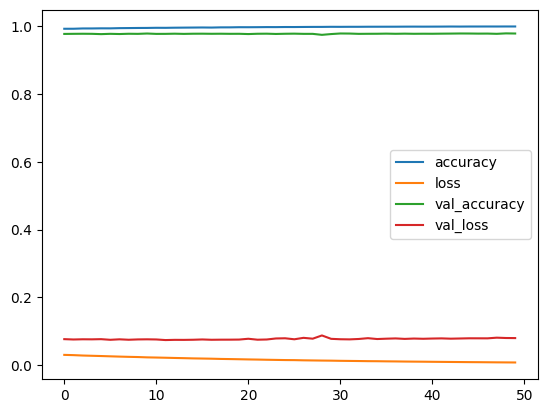

In [34]:
pd.DataFrame(fit_1.history).plot();

In [35]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0952


[0.07987217605113983, 0.978600025177002]

In [36]:
model_1.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])